In [8]:
import json
import pandas as pd
import yaml
import re
from torch import Tensor
from tqdm import tqdm
from unidecode import unidecode
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import math
from torchmetrics import Accuracy, Recall, F1Score
import lightning as L
from transformers import pipeline
from bpe import Encoder

# Load entities data from JSON file
with open('entities.json', 'r') as json_file:
    entities_data = json.load(json_file)

# Load tokens data from YAML file
with open('tokens.yml', 'r') as file:
    tokens = yaml.safe_load(file)

# Create a dictionary to map special characters to their respective tokens
special_char_dict = {value['start']: key for key, value in tokens.items()}
special_chars = list(special_char_dict.keys())

# Normalize function to remove accents and convert to lowercase
def normalize(word):
    word = word.replace(' ', "")
    text_cleaned = unidecode(word)
    text_lower = text_cleaned.lower()
    return text_lower

# Function to extract data from each line based on special characters
def extract_data(result, line, special_characters):
    current_char = None
    memory = {k: None for k in special_characters}
    current_word = ""
    for letter in line:
        if letter in special_characters:
            if current_char is not None and normalize(current_word) != "neant":
                current_word = current_word.replace(' ', '')
                if normalize(normalize(current_word)) == "idem":
                    current_word = memory[letter]
                memory[letter] = current_word
                if current_word is not None and current_word != "":
                    result[current_char].append(current_word)
            current_char = letter
            current_word = ""
        else:
            current_word = current_word + letter
    return result

# Initialize a dictionary to store extracted data
extracted_data = {c: [] for c in special_chars}

# Extract data from entities data
for key, line in entities_data.items():
    line = line.replace("\n", "")
    extracted_data = extract_data(extracted_data, line, special_chars)

# Map keys in the extracted data dictionary using the special character dictionary
mapped_data = {special_char_dict[key]: value for key, value in extracted_data.items()}

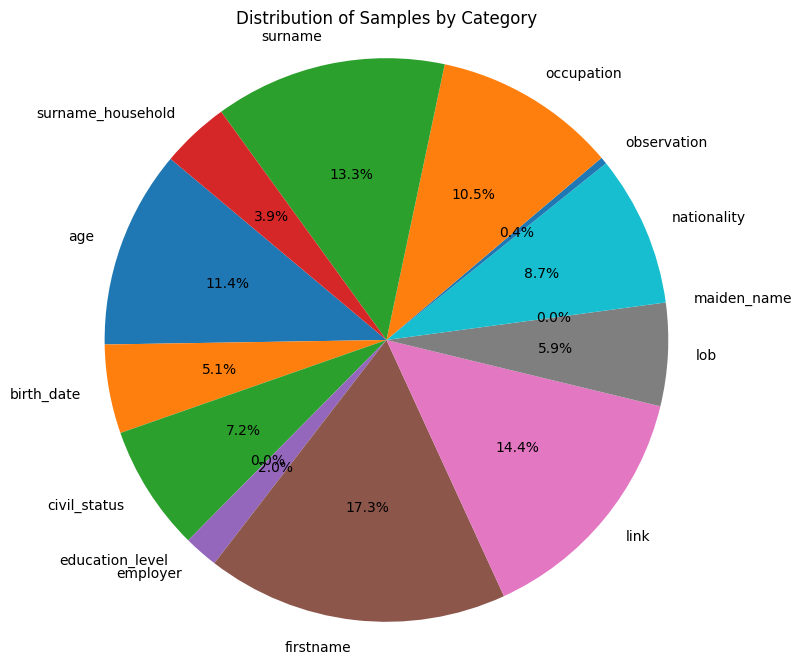

In [9]:
import matplotlib.pyplot as plt
counts = [len(mapped_data[k]) for k in mapped_data.keys()]
categories = list(mapped_data.keys())
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Samples by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

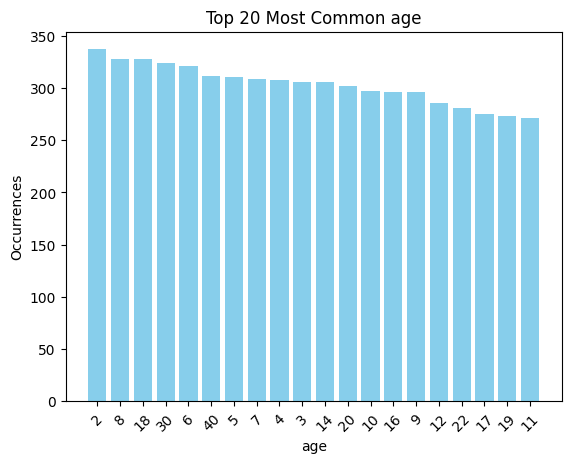

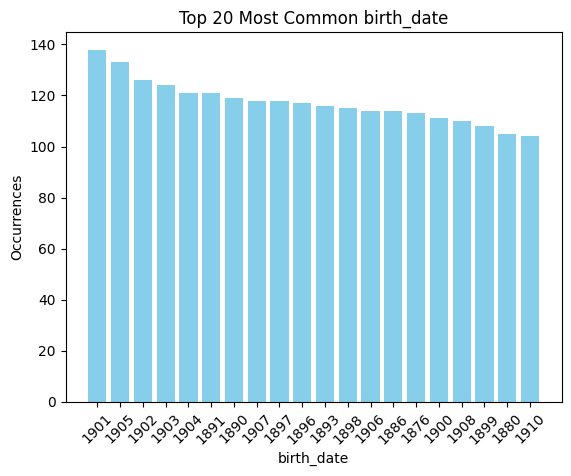

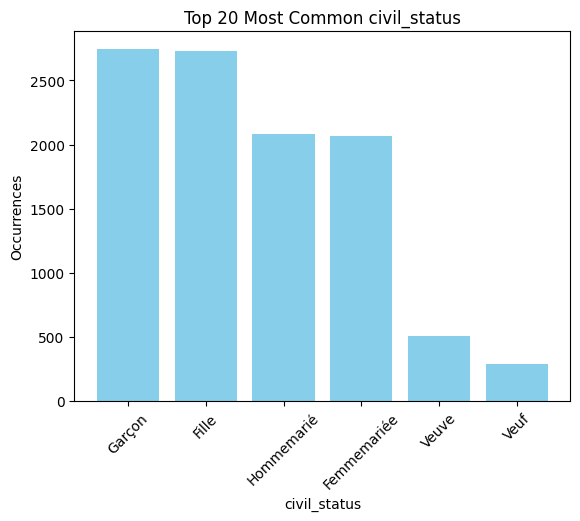

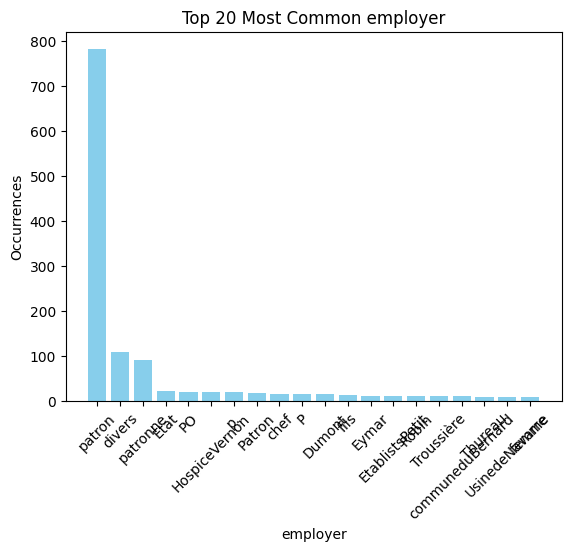

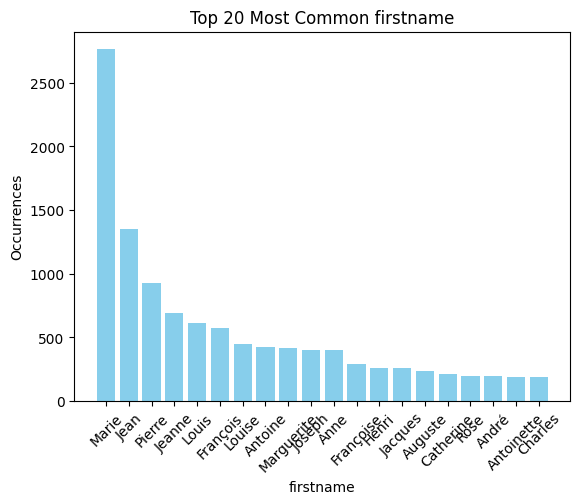

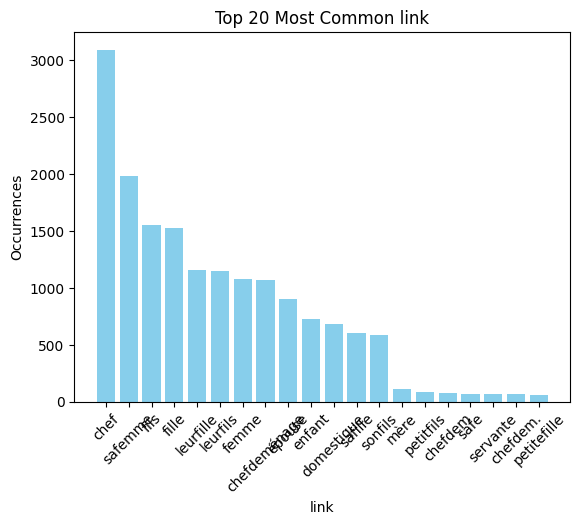

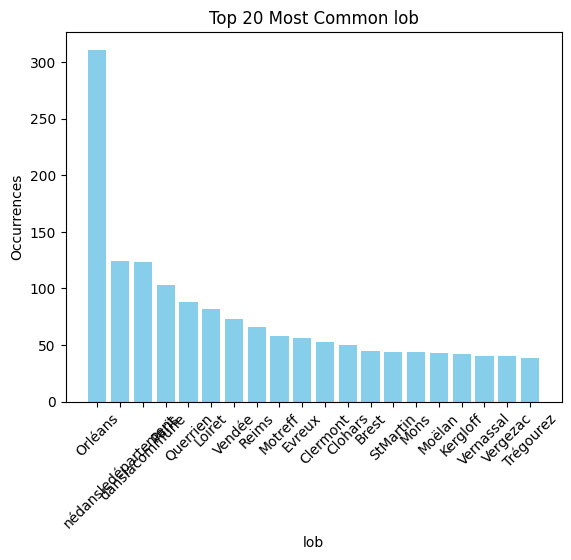

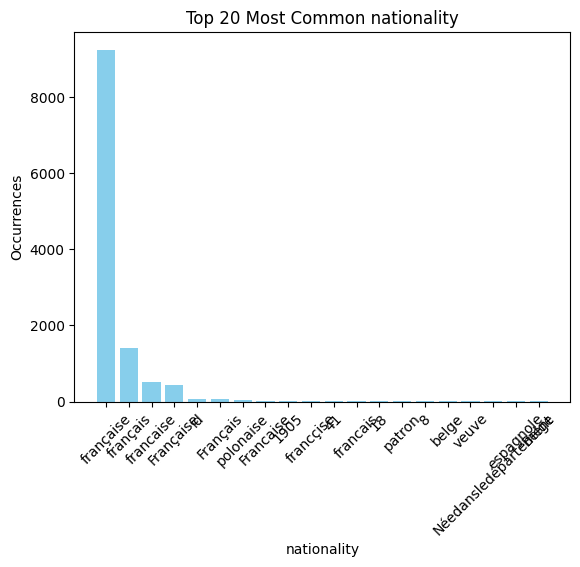

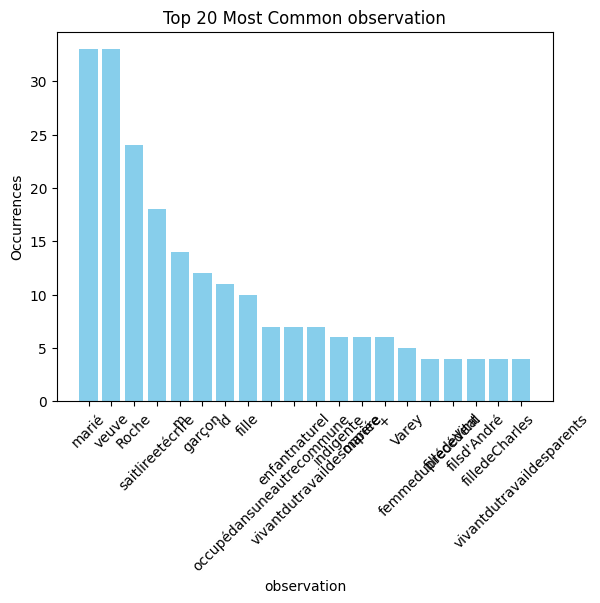

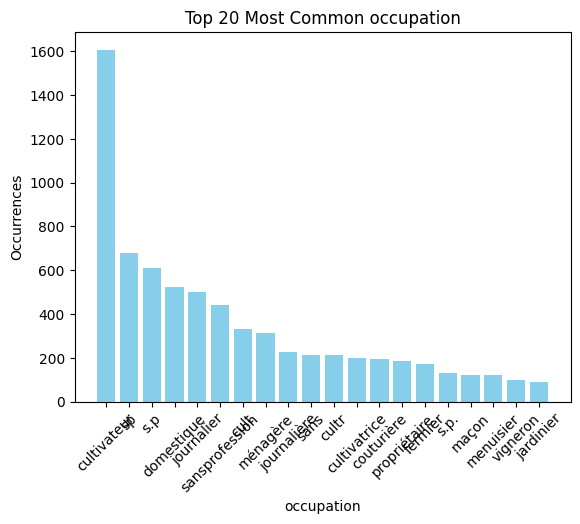

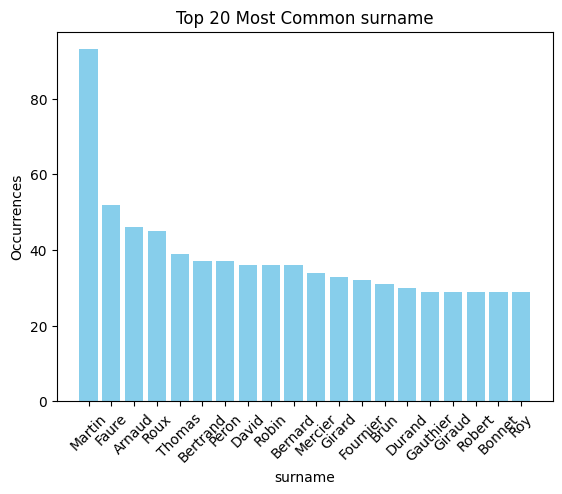

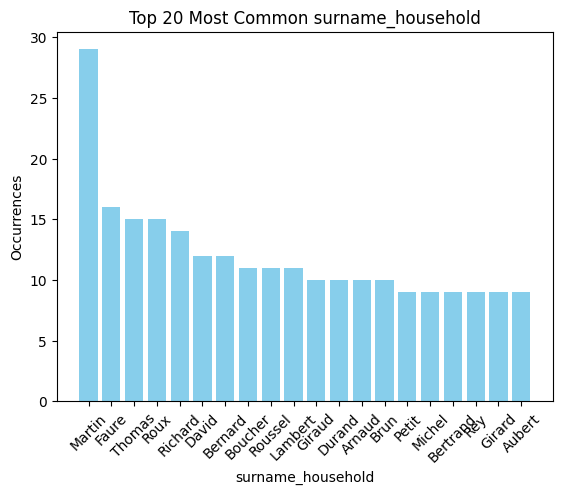

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Example list of names
for k in mapped_data.keys():
    
    names = mapped_data[k]
    if len(names) > 0:
        # Count occurrences of each name
        name_counts = Counter(names)

        # Get the top N most common names (change N to the desired number)
        top_n = 20
        top_names = dict(name_counts.most_common(top_n))

        # Extract names and counts for plotting
        names_to_plot = list(top_names.keys())
        counts_to_plot = list(top_names.values())

        # Create the bar plot
        plt.bar(names_to_plot, counts_to_plot, color='skyblue')
        plt.xlabel(k)
        plt.ylabel('Occurrences')
        plt.title(f'Top {top_n} Most Common '+k )
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()


In [11]:
sum([len(mapped_data[k]) for k in mapped_data.keys()])

144101

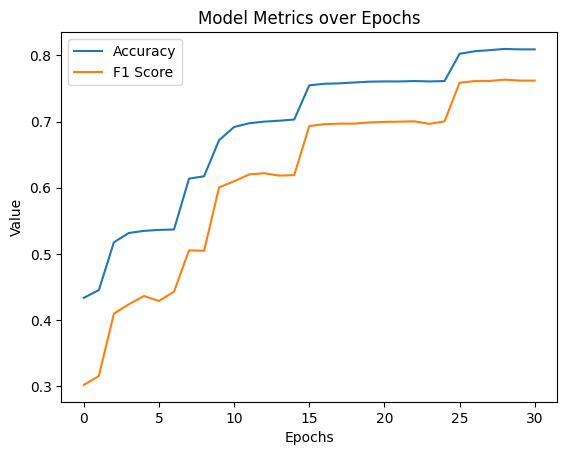

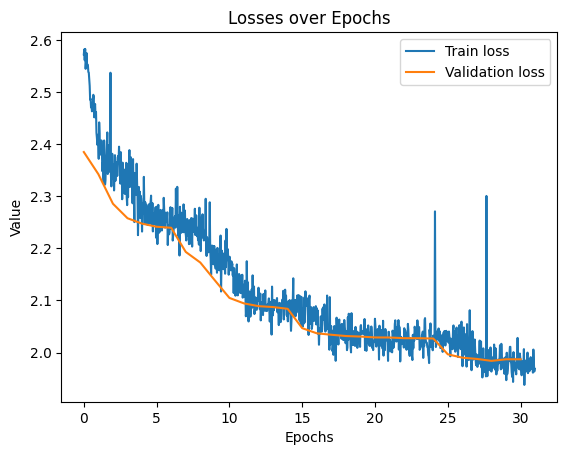

In [12]:
import pandas as pd
path = "/home/tordjx/Downloads/nlp/"
accuracy= pd.read_csv(path+"accuracy.csv")['Value']
f1= pd.read_csv(path+"f1.csv")['Value']
trainloss= pd.read_csv(path+"trainloss.csv")['Value']
val_loss= pd.read_csv(path+"val_loss.csv")['Value']
plt.plot(accuracy, label='Accuracy')
plt.plot(f1, label='F1 Score')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Model Metrics over Epochs')

# Show legend
plt.legend()

# Display plot
plt.show()

plt.plot([i * len(val_loss)/len(trainloss) for i in range(len(trainloss))] ,trainloss,label='Train loss')
plt.plot(val_loss, label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses over Epochs')

# Show legend
plt.legend()

# Display plot
plt.show()

In [13]:
len(trainloss)

1000